<a href="https://colab.research.google.com/github/Ajit103/Ajit103/blob/main/Ajit_Manandhar_Assignment_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Traffic Data Analysis

## Why Traffic Data?
- While the ABI program focuses on private sector industries like marketing, retail, etc., transportation is a very important industry that exists both in the private and public sector.
- This industry is **ripe for disruption** from a data perspective
- Every city and region has their own transportation organization (Metrolinx, TTC, Hamilton Street Railway, Ottawa-Carleton Transpo, etc.)
- Private companies are also very interested in transportation, specifically traffic (Uber, Lyft, Lime, Google, Waze, etc.)
- It is the instructors favourite industry for data analysis
- There are lots of public data from many regions related to transportation and traffic!



# Reminder: How to Take this Course

In this course, we will be learning programming and data analysis. These subjects involve theory and practice. The ABI program focuses on PRACTICE.
- Save a copy of this Notebook in your Drive
- Write and edit code in your Notebook
- Ask as many questions as you have (this is an intro course, there are NO dumb questions)
- Bring your own problems and ask questions on how to approach them (data analysis problem at work or school)

If you do not do these things, you will not retain much from this course. [Studies have shown](https://www.psychotactics.com/art-retain-learning/) that you retain:

- 75% of what you learn through practice
- 50% of what you learn through discussion with others
- 30% of what you learn through a demonstration
- 10% of what you learn from reading
- 5% of what you learn from a lecture

### Recommendations

* Learning Python requires context. **Experiment** with your creativity when learning it and use any search engine (Google, Bing, etc.) to explore the concept further with different examples.

* **Practice** makes perfect. When exploring a programming concept, try to test it with different approaches to understand what works and what does not and why it does so.

* Do not be afraid to **test the limits**. You can create a backup copy of this file and if anything goes wrong, you can always use the backup copy.


## Do you want to retain 75% of this course or 30%? The choice is yours.

---



# The Process

1. **Understand the problem.** We're going to read the case study and try to understand what is being asked of us. 
2. **Collect the data.** In this case study, the data has already been collected. We will summarize how the data was collected.
3. **Import and explore the Data.** We will import the data into Pandas and go through some README files to understand it.
4. **Define metrics for analysis.** It is important that we define some metrics to analyze before we start the analysis. This helps reduce the bias in our analysis.
5. **Clean the data.** We will slice and clean the data to prepare it for our analysis.
6. **Visualize the data.** We will make some simple visualizations to analyze the data.
7. **Generalize the work.** We will turn most of our code into functions that can be used in other analyses.

# The Problem

## King Street Transit Pilot
<img src='https://www.toronto.ca/wp-content/uploads/2019/06/9748-SPER-3866-04-1024x338.jpg' width=600>

The King Street Transit Pilot, also known as the "The King Street Transit Priority Corridor" is a project in the City of Toronto that aims to reduce traffic by diverting car traffic so that streetcars can go faster and other forms of transportation (cyclists, pedestrians) can safely increase, while making the area more of a "place" and not just a road.

Here's an image of the new street design:

<img src='https://www.toronto.ca/wp-content/uploads/2019/06/96b4-25-March-2019-KSP-Curb-Lane-Uses-FINAL-01-1024x360.png' width=600>

- Cars must turn right when they reach the boundaries of the area (Bathurst on the left or Jarvis on the right)
- There are some designated loading zones and taxi stands (they do **NOT** allow Uber/Lyft to use the taxi stands)
- There are curb lane cafe's (patios)
- There are TTC stops for the streetcar that goes east-west
- No street parking

I encourage you to visit this [neighbourhood](https://www.google.ca/maps/dir/Jarvis+Street+%26+King+Street+East,+Toronto,+ON/Bathurst+St+%26+King+St+W,+Toronto,+ON+M5V+2P9/@43.6474672,-79.3967461,14.94z/data=!4m14!4m13!1m5!1m1!1s0x89d4cb31aad1e4f3:0xa100366e19da353f!2m2!1d-79.3719073!2d43.6504761!1m5!1m1!1s0x882b34dfd4de979d:0xe18df58b063573c2!2m2!1d-79.4026703!2d43.6439035!3e2) if you are ever in the area. Here are the [rules depending on your type of transit](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/how-to-use-the-king-street-transit-pilot/) (car/TTC/bicycle).


The pilot project was launched on November 12, 2017 and ran for about a year before the changes were made permanent in 2019.

The city collected traffic data before and after the pilot project launched, so they could determine the impact on traffic (positive or negative). Data was collected using cameras at 31 intersections in the corridor. They also [released dashboards periodically](https://www.toronto.ca/city-government/planning-development/planning-studies-initiatives/king-street-pilot/data-reports-background-materials/) to show the public how the project was going.

## Analysis Question
What was the impact of this pilot project on private vehicle traffic, and is it significant?

**We're going to analyze this data and determine the answer to this question!**

---

# Data Collection

GPS tracking of TTC streetcars

Bluetooth sensors to evaluate car travel times

pedestrian and car volumes using video analytics

City obtained trend data on customer spending from Moneris Solutions Corporation




# Importing and Exploring the Data

[Travel Time Line Segments](https://open.toronto.ca/dataset/king-st-transit-pilot-bluetooth-travel-time-segments/)

[Travel Time Data](https://open.toronto.ca/dataset/king-st-transit-pilot-detailed-bluetooth-travel-time/)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

travel_times = pd.read_csv(travel_times_url)

travel_times.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


Uh-oh! We have a problem. Reading through the README file, we see that the result_id column represents a segment of road, but those codes are not readible. We need to translate those codes so we can extract the data for the segment we're interested in (Bathurst to Spadina). To do that, we need to look at the GeoJSON data.

**We need to install a library to do that!**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 376 kB/s 
     |████████████████████████████████| 6.3 MB 34.6 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_places = gpd.read_file(url_seg)

df_places.head()


,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


Now we're going to use conditional indexing to find the segment name that goes from Bathurst to Spadina.

In [ ]:
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['from_intersection'] == 'Bathurst']

df3 = df2[df2['to_intersection'] == 'Spadina']

df3

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
92,KN_BA_KN_SP,King,EB,Bathurst,Spadina,642,"MULTILINESTRING ((-79.40271 43.64393, -79.4008..."


In [ ]:
df3['segment_name']

92    KN_BA_KN_SP
Name: segment_name, dtype: object

In [ ]:
df3['segment_name'].iloc[0]

'KN_BA_KN_SP'

The segment name we want to use is KN_BA_KN_SP. Let's use that to filter our data using more conditional indexing.

In [ ]:
bathurst_spadina = travel_times[travel_times['result_id'] == 'KN_BA_KN_SP']

bathurst_spadina.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
532070,KN_BA_KN_SP,2017-09-21 00:00:00,Weekday,Baseline,NaN,212.0,1
532071,KN_BA_KN_SP,2017-09-21 00:05:00,Weekday,Baseline,NaN,296.0,1
532072,KN_BA_KN_SP,2017-09-21 00:20:00,Weekday,Baseline,NaN,209.0,1
532073,KN_BA_KN_SP,2017-09-21 00:25:00,Weekday,Baseline,NaN,175.0,1
532074,KN_BA_KN_SP,2017-09-21 00:30:00,Weekday,Baseline,NaN,203.0,2


Now let's describe our current dataset.

In [ ]:
bathurst_spadina.describe(include='all')

Let's analyze what the unique values are in each of our columns.

In [ ]:
bathurst_spadina['period_name'].unique()

In [ ]:
bathurst_spadina['day_type'].unique()

In [ ]:
bathurst_spadina['category'].unique()

# Defining Metrics

In order to conclude whether private vehicle traffic was "better" or "worse", we need to come up with a definition for "better" or "worse"

Some options:
- Average travel time between Bathurst and Jarvis
- Average travel time between Bathurst and Spadina
- Average travel time during peak periods (7-10AM, 4-7PM)
- Median travel time during specific periods

**Why would we care more about traffic during peak periods than we do in the evenings and weekends?**

We're going to calculate the average private vehicle travel time for peak periods between Bathurst and Spadina (Eastbound), ***before*** and ***after*** the pilot.

# Data Cleaning

In this context, data cleaning means we're going to:
- Get rid of missing data or erroneous data
- Filter to include only the data we want to analyze
- Aggregate the data to make the analysis simpler
- Calculate our metrics


First we are going to drop missing data - any data where the 'period_name' column is null. To do that, we will use the Pandas DataFrame [dropna() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
bathurst_spadina['period_name']

In [ ]:
bathurst_spadina['period_name'].unique()

In [ ]:
bathurst_spadina = bathurst_spadina.dropna(subset=['period_name'])

Second, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. Recall that:

In [ ]:
bathurst_spadina['category'].unique()

In [ ]:
bathurst_spadina = bathurst_spadina[bathurst_spadina['category'] != 'Excluded']

Now there should be no more "Excluded" category in the dataset:

In [ ]:
bathurst_spadina['category'].unique()

Now, let's use Pandas [Groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to aggregate the data and calculate the mean travel time in seconds.

In [ ]:
compare_summary = bathurst_spadina.groupby(['category', 'period_name']).mean()
compare_summary

The Pandas GroupBy function **makes the groups into indices**. Let's reset the index to undo that.

In [ ]:
compare_summary = compare_summary.reset_index()
compare_summary

**Melted vs Pivoted Data**


**Melting Data**

<img src='https://pandas.pydata.org/pandas-docs/dev/_images/reshaping_melt.png' width=600>

**Pivoting Data - We're going to Pivot this data!**

<img src='https://pandas.pydata.org/pandas-docs/dev/_images/reshaping_pivot.png' width=600>

In [ ]:
compare_summary.pivot(index='period_name', columns='category', values='tt')

In [ ]:
pivoted_data = compare_summary.pivot(index='period_name', columns='category', values='tt')
pivoted_data

In [ ]:
pivoted_data['pct_diff'] = (pivoted_data['Pilot'] - pivoted_data['Baseline']) / pivoted_data['Baseline'] * 100

pivoted_data

# Visualizations

In [ ]:
sns.barplot(data=compare_summary, x='period_name', y='tt', hue='category')

In [ ]:
ax1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')

# Generalizing (Writing Functions)

## Getting the Segment Code

In [ ]:
def get_segment(street_name, from_street, to_street, input_df):
    """Get the segment code from the street name and from/to streets."""
    # Copy code from  'Importing and Exploring the Data' section of Notebook
    
    # Instead of 'King', I use the function's input parameter street_name
    # Instead of df_places, I use the function's input parameter input_df
    # Old Code:
    # df1 = df_places[df_places['street'] == 'King']
    # Generalized Code:
    df1 = input_df[input_df['street'] == street_name]
    
    # Old Code:
    # df2 = df1[df1['from_intersection'] == 'Bathurst']
    # Generalized Code:
    df2 = df1[df1['from_intersection'] == from_street]
    
    # Instead of 'Spadina', I use the function's input parameter to_street
    # Old Code:
    # df3 = df2[df2['to_intersection'] == 'Spadina']
    # Generalized Code:
    df3 = df2[df2['to_intersection'] == to_street]
    
    # The resulting DataFrame has one row. But we still have to use indexing
    # to extract the string. Get the column, then use iloc to get the value.
    segment_code = df3['segment_name'].iloc[0]
    
    # Now we return the segment_code
    return segment_code

In [ ]:
# Test the generalized code
get_segment('King', 'Bathurst', 'Spadina', df_places)

In [ ]:
segment_of_interest = get_segment('King', 'Bathurst', 'Spadina', df_places)

print(segment_of_interest)

In [ ]:
# Test with different inputs
segment_of_interest2 = get_segment('King', 'Yonge', 'Jarvis', df_places)

print(segment_of_interest2)

## Processing the Data

In [ ]:
def get_analysis(input_times, segment_of_interest, group_column, minutes):
    """Clean and pivot our data."""
    # Copy the code from the "Importing and Exploring the Data" and "Data Cleaning" sections.
    # Old Code:
    # bathurst_spadina = travel_times[travel_times['result_id'] == 'KN_BA_KN_SP']
    # Generalized Code:
    segment_data = input_times[input_times['result_id'] == segment_of_interest]

    # Old Code:
    # bathurst_spadina = bathurst_spadina.dropna(subset=['period_name'])
    # Generalized Code:
    segment_data = segment_data.dropna(subset=['period_name'])
    
    # Old Code:
    # bathurst_spadina = bathurst_spadina[bathurst_spadina['category'] != 'Excluded']
    # Generalized Code:
    segment_data = segment_data[segment_data['category'] != 'Excluded']

    # Apply GroupBy to summarize the data.
    # Old Code:
    # compare_summary = bathurst_spadina.groupby(['category', 'period_name']).mean()
    # Generalized Code:
    compare_summary = segment_data.groupby(['category', group_column]).mean()

    # Reset the index like we did before.
    compare_summary = compare_summary.reset_index()

    # Pivot the data.
    # Old code is the same as the new code:
    pivoted_data = compare_summary.pivot(index=group_column, columns='category', values='tt')

    # Minutes or seconds:
    if minutes == True:
        pivoted_data = pivoted_data / 60

    # Calculate the percent difference between Baseline and Pilot.
    # Old code is the same as the new code:
    pivoted_data['pct_diff'] = (pivoted_data['Pilot'] - pivoted_data['Baseline']) / pivoted_data['Baseline'] * 100

    # Do we return the pivoted data or the melted data? You choose.
    # Bonus/Optional: You can return both!
    return pivoted_data


In [ ]:
segment_of_interest = get_segment('King', 'Bathurst', 'Spadina', df_places)

get_analysis(travel_times, segment_of_interest, 'period_name', False)

In [ ]:
# Try with different inputs
segment_of_interest = get_segment('King', 'Yonge', 'Jarvis', df_places)

get_analysis(travel_times, segment_of_interest, 'period_name', True)

## Generalized Analysis

In [ ]:
# To change your analysis, you only have to change the variable names.
street = 'King'
from_street = 'Bathurst'
to_street = 'Spadina'
grouping_column = 'period_name'
minutes_bool = False
# --

time_unit = 'seconds'
if minutes_bool: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to_street, df_places)

pivoted_data = get_analysis(travel_times, segment_of_interest, grouping_column, minutes_bool)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
ax1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')

ax1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to_street)

# Course Assignment
Answer the following question **Did traffic get better or worse?** on the following slices of the data
- Weekdays from Yonge to Jarvis
- Weekends from Jarvis to Parliament

Calculate the travel times in your analysis in **minutes**, not **seconds**.

You will be graded for completeness. If you follow the necessary steps and your code runs without error, you will get full marks.

## Hints
- Since we generalized our analysis, all you have to do is copy the 'Generalized Analysis' cell and change the variable names.
- You may compare your answers with each other in the Slack.

## Submission
- Due date is 7 days from now.
- Submit a Jupyter/Colab Notebook by sharing your saved copy of this Notebook with Adnan (adnan.rahman@weclouddata.com)
- Your submission should include all your calculation steps and an answer to the question: **"Did traffic get better or worse after the pilot?"**


# Assignment: Your Code Here

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


In [ ]:
# Import travel time data
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

time_interval = pd.read_csv(travel_times_url)

time_interval.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


In [ ]:
#install and import geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 16.7 MB 198 kB/s 
     |████████████████████████████████| 6.3 MB 36.1 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
# Import geojason data for name of the segment
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_segment = gpd.read_file(url_seg)

df_segment.head()

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


In [ ]:
# Creating function to retrieve the segment code

def get_segment(street_name, street_from, to, place_df):
    """Get the segment code from the street name and from/to streets."""
    df1 = place_df[place_df['street'] == street_name]

    df2 = df1[df1['from_intersection'] == street_from]
    
    df3 = df2[df2['to_intersection'] == to]
    
    segment_code = df3['segment_name'].iloc[0]

    return segment_code

In [ ]:
#Test generalized code
get_segment('King', 'Bathurst', 'Spadina', df_segment)

'KN_BA_KN_SP'

In [ ]:
# Defining function for Analysis
def analyze_data(times_df, segment_of_interest, column_to_groupby, minutes):
    """Clean and pivot our data."""
    street_data = times_df[times_df['result_id'] == segment_of_interest]

    street_data = street_data.dropna(subset=['period_name'])
    
    street_data = street_data[street_data['category'] != 'Excluded']

    summary_comparison = street_data.groupby(['category', column_to_groupby]).mean()

    summary_comparison = summary_comparison.reset_index()

    pivoted_data = summary_comparison.pivot(index=column_to_groupby, columns='category', values='tt')

    # Minutes or seconds:
    if minutes == True:
        pivoted_data = pivoted_data / 60

    pivoted_data['pct_diff'] = (pivoted_data['Pilot'] - pivoted_data['Baseline']) / pivoted_data['Baseline'] * 100

    return pivoted_data


In [ ]:
#Test code
segment_of_interest = get_segment('King', 'Bathurst', 'Spadina', df_segment)

analyze_data(time_interval, segment_of_interest, 'period_name', False)

category,Baseline,Pilot,pct_diff
period_name,,,
AM Peak,148.363544,167.316901,12.774943
Afternoon,166.645455,185.319231,11.205692
Evening,233.690157,189.215976,-19.031260
Midday,187.741902,176.057377,-6.223717
Morning,119.497596,163.355769,36.702138
PM Peak,223.014706,198.466981,-11.007222


In [ ]:
segment_of_interest = get_segment('King', 'Bathurst', 'Spadina', df_segment)

analyze_data(time_interval, segment_of_interest, 'day_type', True)

category,Baseline,Pilot,pct_diff
day_type,,,
Weekday,3.315186,3.137724,-5.352995
Weekend,2.905640,2.939502,1.165384


**Weekdays from Yonge to Jarvis**

Travel time in minutes
----------------
category  Baseline     Pilot   pct_diff
day_type                               
Weekday    2.20313  2.663815  20.910455
Weekend    1.85486  3.220607  73.630731



Text(0.5, 1.0, 'Percent Change in Travel Time: Yonge to Jarvis')

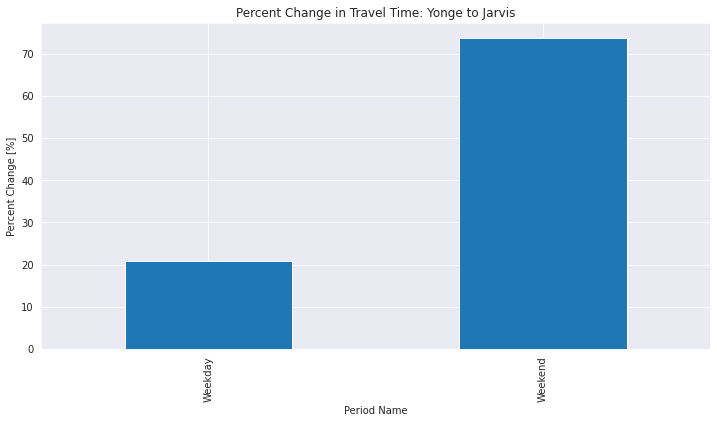

In [ ]:
street = 'King'
from_street = 'Yonge'
to = 'Jarvis'
column_to_groupby = 'day_type'
min_boolean = True
# --

time_unit = 'seconds'
if minutes_bool: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to, df_segment)

pivoted_data = analyze_data(time_interval, segment_of_interest, column_to_groupby, min_boolean)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
plt1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

plt1.set_ylabel('Percent Change [%]')

plt1.set_xlabel('Period Name')

plt1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to)

**Conclusion**

As we can see from the above analysis, the travel time has increased significantly, just over 20%, on Weekdays from Yonge to Jarvis. This shows that the King Street Transit Pilot project has failed to reduce travel time for the traffic in this particular segment of the road.

**Jarvis to Parliament**

Travel time in minutes
----------------
category  Baseline     Pilot   pct_diff
day_type                               
Weekday   2.856477  3.071697   7.534455
Weekend   2.350105  3.438091  46.295192



Text(0.5, 1.0, 'Percent Change in Travel Time: Jarvis to Parliament')

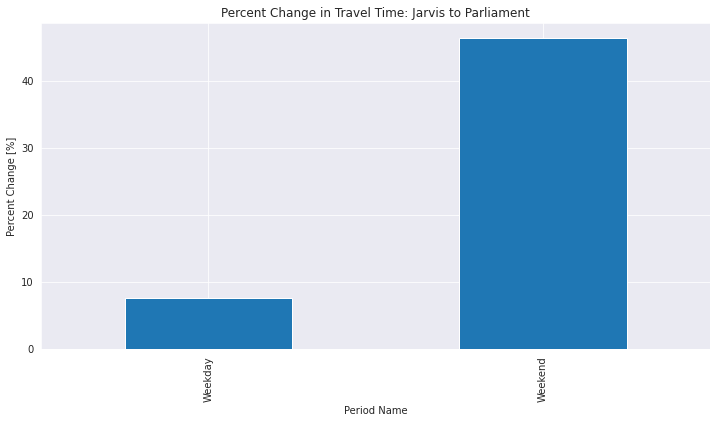

In [ ]:
street = 'King'
from_street = 'Jarvis'
to = 'Parliament'
column_to_groupby = 'day_type'
min_boolean = True
# --

time_unit = 'seconds'
if minutes_bool: # == True
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to, df_segment)

pivoted_data = analyze_data(time_interval, segment_of_interest, column_to_groupby, min_boolean)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
plt2 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

plt2.set_ylabel('Percent Change [%]')

plt2.set_xlabel('Period Name')

plt2.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to)

**Conclusion**

As we can see from the above analysis, the travel time has increased significantly, almost 50%, on Weekends from Jarvis to Parliament. This shows that the King Street Transit Pilot project has failed to reduce travel time for the traffic in this particular segment of the road.

# Summary of Commands
```
!pip install geopandas
pandas.DataFrame.describe(include='all')
pandas.DataFrame.unique()
pandas.DataFrame.groupby()
pandas.DataFrame.reset_index()

```

# Resources
- The world's most popular Python podcast: [Talk Python to Me](https://talkpython.fm)
- The definitive book on Pandas: [Python for Data Analysis](https://wesmckinney.com/book/)
- The BEST Introduction to Applied Statistics: [StatQuest - Joshua Starmer](https://www.youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9)